# K-means e hierarchical clustering

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data.shape

(891, 12)

In [50]:
data = data.drop(['Fare'], axis=1)

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S


In [52]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [53]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Cabin          687
Embarked         2
dtype: int64

In [54]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S


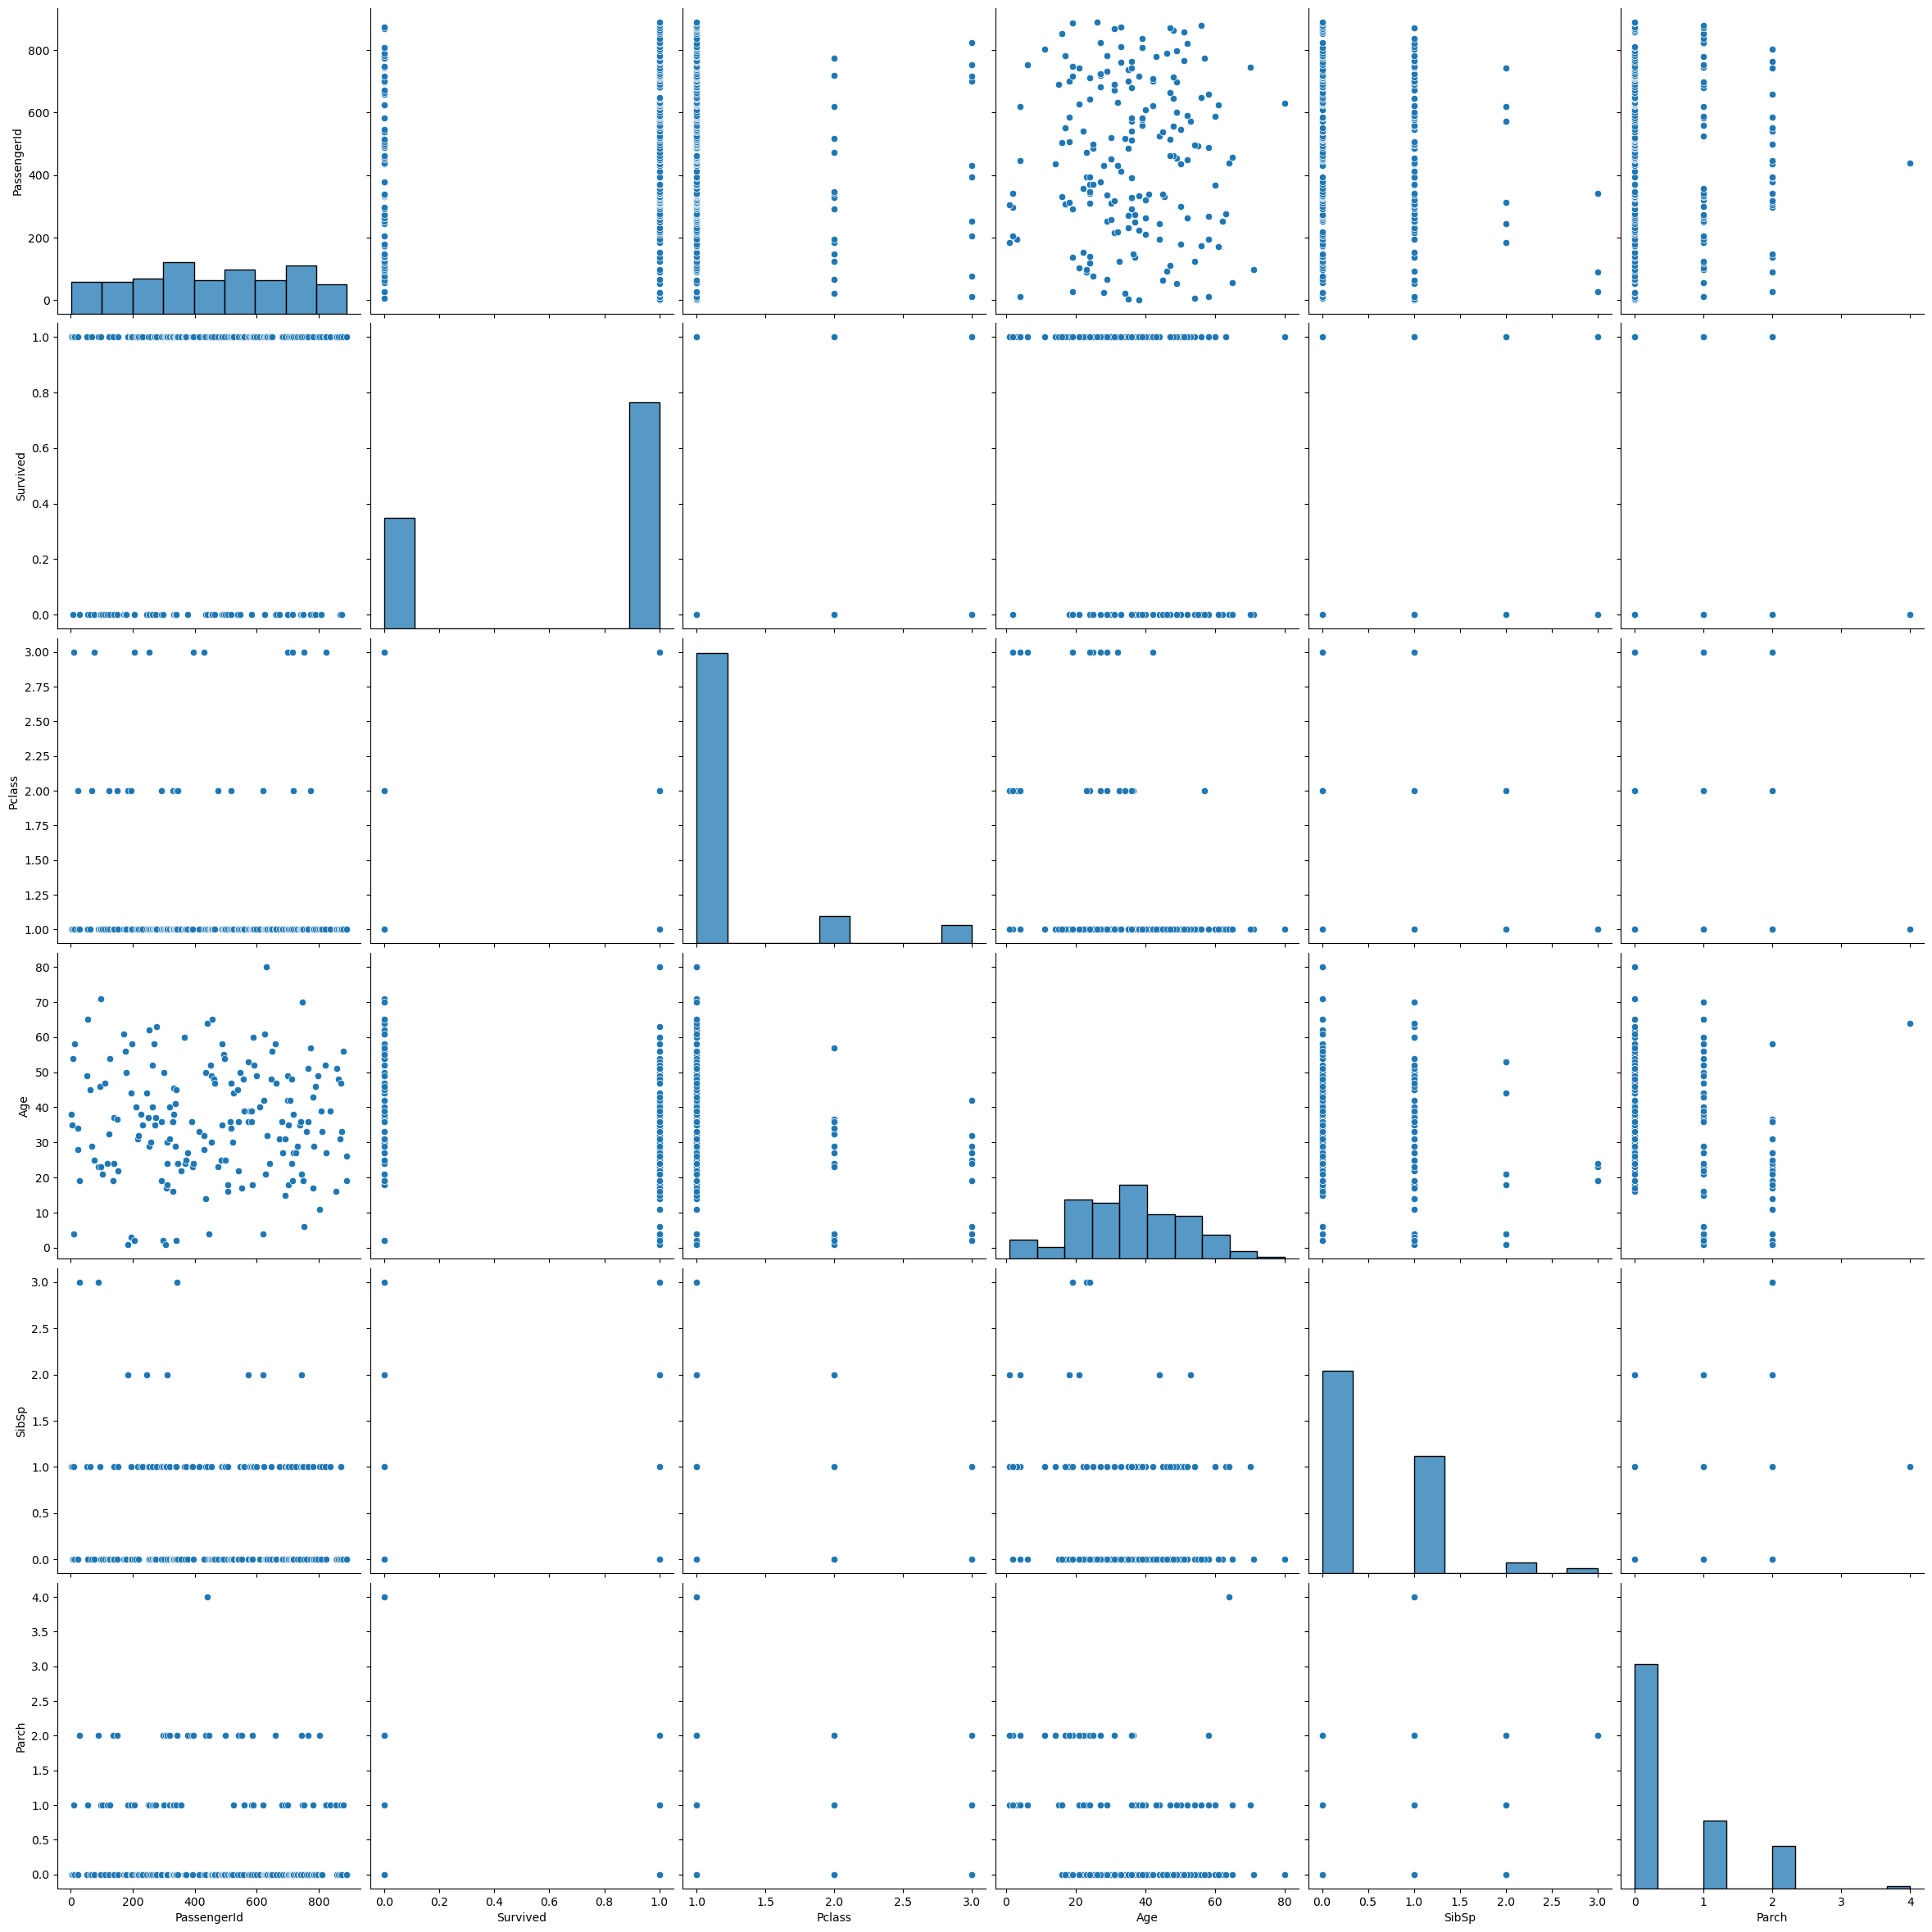

In [55]:
sns.pairplot(data.dropna(), size=4, kind='scatter')

In [64]:
data_encoded = pd.get_dummies(data, columns=['Sex'])
numeric_data = data_encoded.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000


<Axes: >

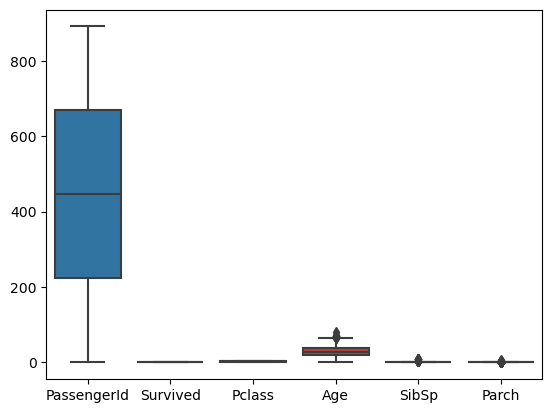

In [65]:
sns.boxplot(data=data)

In [107]:
data_cleaned = data.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])
data_encoded = pd.get_dummies(data_cleaned, columns=['Sex'])

numeric_cols = data_encoded.select_dtypes(include=[float, int]).columns
data_encoded[numeric_cols] = data_encoded[numeric_cols].fillna(data_encoded[numeric_cols].mean())
numeric_data = data_encoded.select_dtypes(include=[float, int])

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

print("Scaled DataFrame:\n", X_scaled)

Scaled DataFrame:
      PassengerId  Survived    Pclass       Age     SibSp     Parch
0      -1.730108 -0.789272  0.827377 -0.592481  0.432793 -0.473674
1      -1.726220  1.266990 -1.566107  0.638789  0.432793 -0.473674
2      -1.722332  1.266990  0.827377 -0.284663 -0.474545 -0.473674
3      -1.718444  1.266990 -1.566107  0.407926  0.432793 -0.473674
4      -1.714556 -0.789272  0.827377  0.407926 -0.474545 -0.473674
..           ...       ...       ...       ...       ...       ...
886     1.714556 -0.789272 -0.369365 -0.207709 -0.474545 -0.473674
887     1.718444  1.266990 -1.566107 -0.823344 -0.474545 -0.473674
888     1.722332 -0.789272  0.827377  0.000000  0.432793  2.008933
889     1.726220  1.266990 -1.566107 -0.284663 -0.474545 -0.473674
890     1.730108 -0.789272  0.827377  0.177063 -0.474545 -0.473674

[891 rows x 6 columns]


# K-MEANS

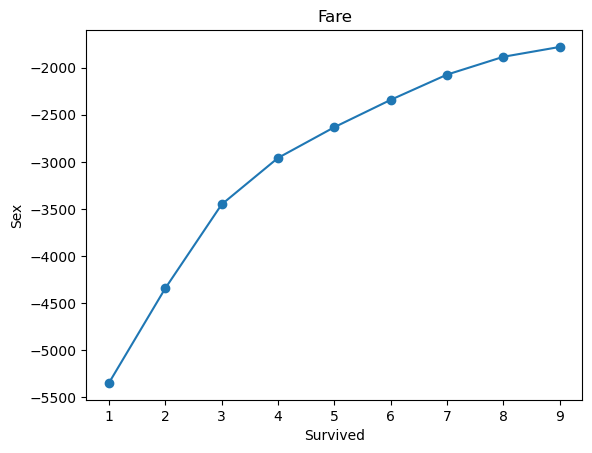

In [108]:
Nc= range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.title('Fare')
plt.show()

In [110]:
kmeans = KMeans(n_clusters=3).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[-0.08645346,  0.2310104 ,  0.32492828, -1.00195221,  1.38861567,
         1.82889698],
       [ 0.04682122,  0.6060484 , -1.23700285,  0.62306009, -0.16993868,
        -0.17221419],
       [-0.00371779, -0.41657482,  0.63290666, -0.09000226, -0.27984546,
        -0.39867819]])

In [111]:
labels = kmeans.labels_

C = kmeans.cluster_centers_
colores=['cyan','yellow','pink']
asignar=[]
for row in labels:
    asignar.append(colores[row])

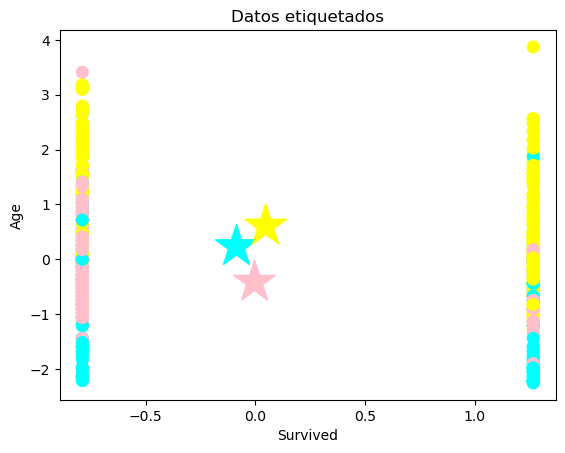

In [113]:
f1 = x['Survived'].values
f2 = x['Age'].values
plt.scatter(f1,f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [114]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inertia (Suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.26532720111808844
Indice de Calinski-Harabasz: 243.69468419256273
Inertia (Suma de cuadrados dentro de los clusters): 3451.5665957007113
Davies-Bouldin Index: 1.4708886710581897


# Hierarchical clustering

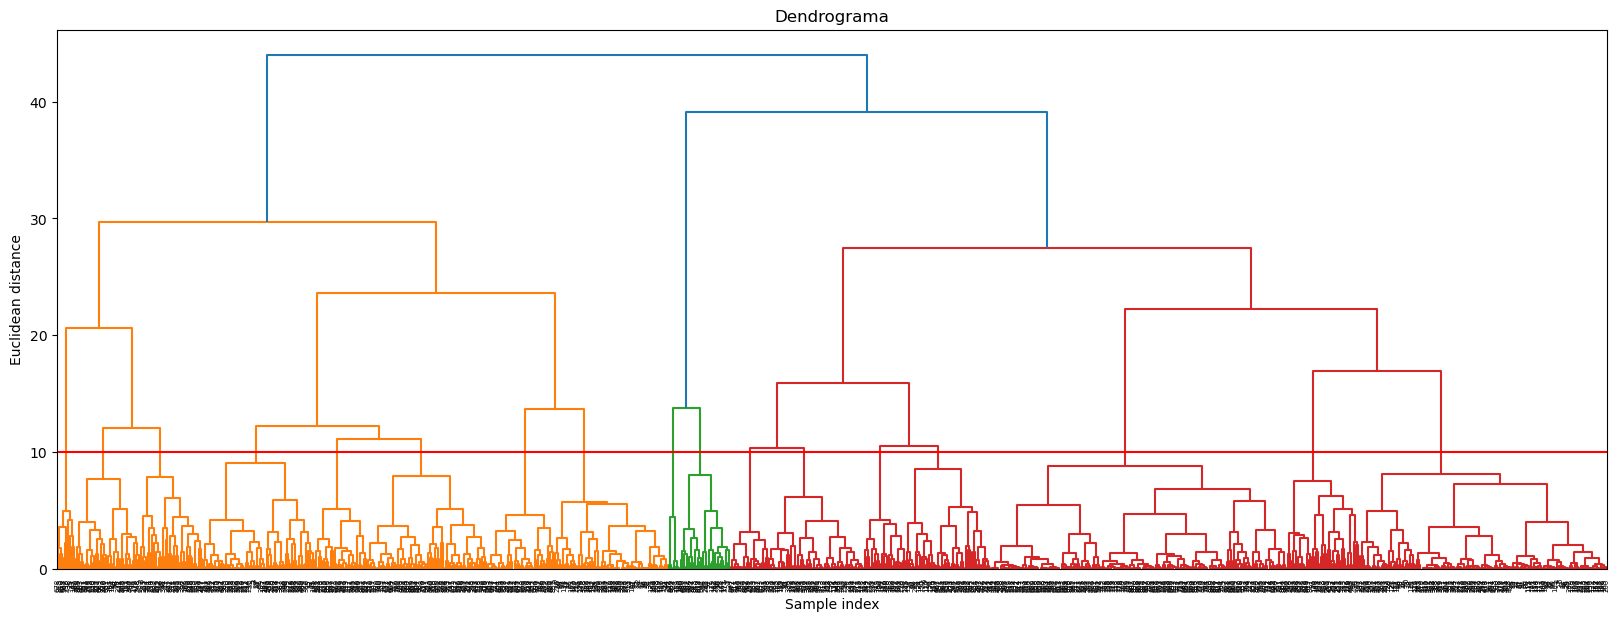

In [115]:
ward_clustering = linkage(x, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram (ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [116]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0,
       0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [117]:
labels = labels_hier
colores=['Cyan','yellow','pink']
asignar=[]
for row in labels:
    asignar.append(colores[row])

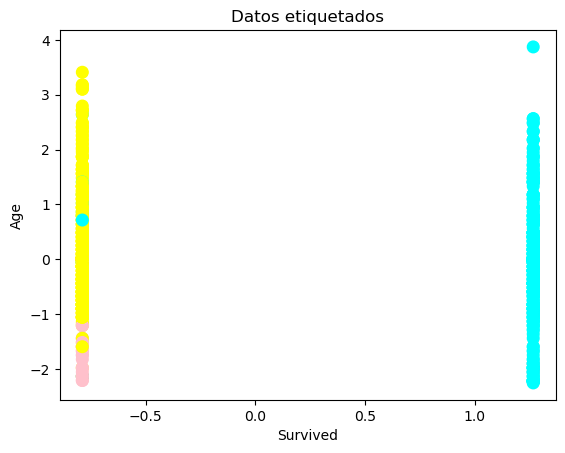

In [119]:
f1 = x['Survived'].values
f2 = x['Age'].values
plt.scatter(f1,f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [121]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

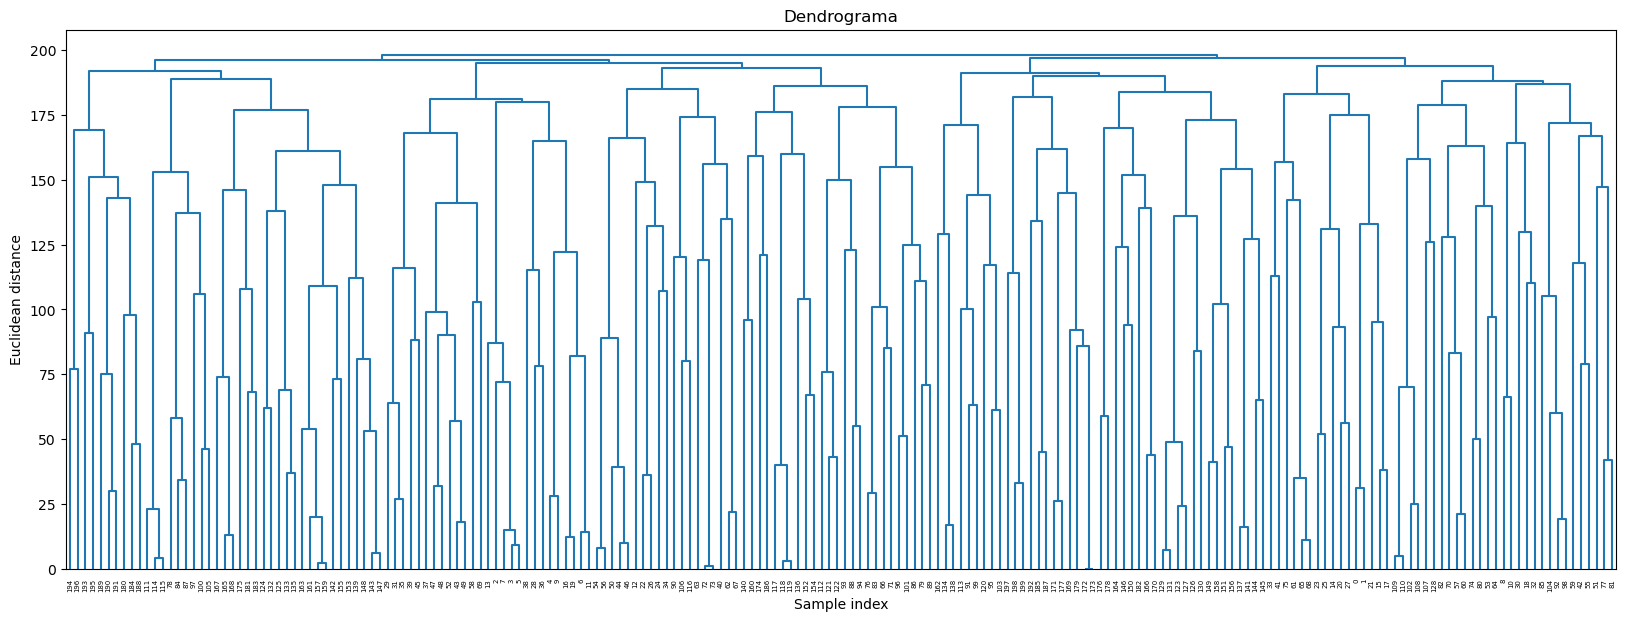

In [96]:
plot_dendrogram(hier_clustering, color_threshold=0)

Text(0, 0.5, 'Pasajeros')

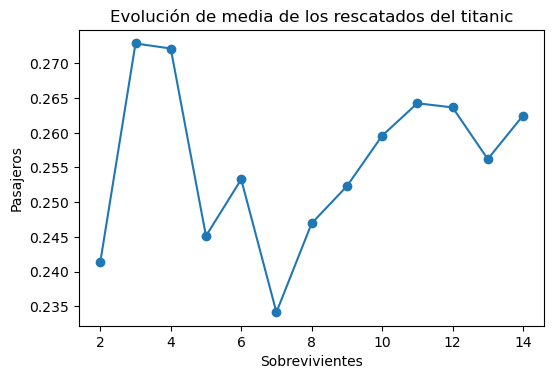

In [122]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        affinity = 'euclidean',
        linkage = 'ward',
        n_clusters = n_clusters
    )
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los rescatados del titanic")
ax.set_xlabel('Sobrevivientes')
ax.set_ylabel('Pasajeros')

In [123]:
print("\nMedidas de calidad para clustering jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Índice de calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))


Medidas de calidad para clustering jerárquico:
Puntaje de silueta: 0.27286626573193545
Índice de calinski-Harabasz: 213.1185698959277
Davies-Bouldin Index: 1.4427776939575965


In [124]:
X_dist = pdist(x)
Z = linkage(x, 'ward')
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.5544095989342969, array([43.98264492, 43.98264492, 43.98264492, ..., 43.98264492,
       22.26281951, 43.98264492]))
